<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/PracticaRegresionLinealMultiple_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Ramon Humberto Delgado Andrade
*   Matrícula:263165

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [ ]:
#for google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Tu código aquí
# Escribe tu código aquí
# Cargar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#load dataframe local
df = pd.read_csv("advertising.csv")
#load dataframe google
#df = pd.read_csv("/content/drive/MyDrive/ClassFiles/advertising.csv")

display(df.head())
display(df.info())
display(df.describe())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

   **La variable que tiene mas relacion con ventas es TV ya que parece se comportan linealmente, para Newspaper y Radio veo muy dispersos los datos.**

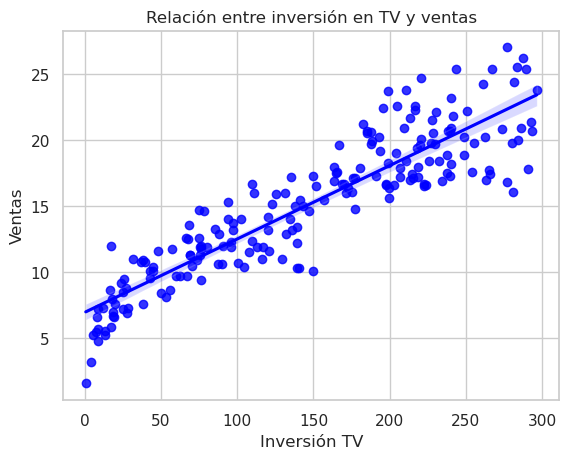

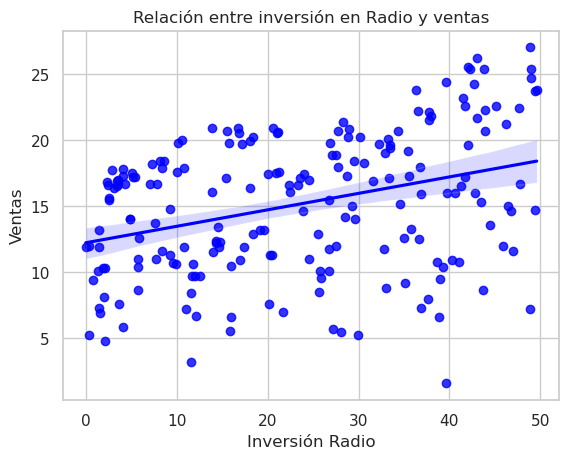

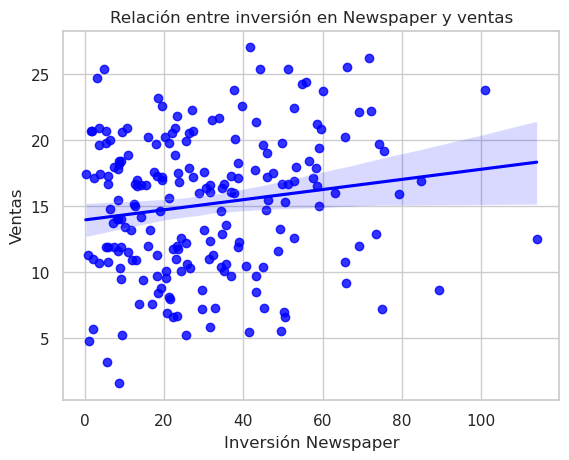

In [ ]:
# Gráficos de dispersión
ind = ['TV', 'Radio', 'Newspaper']

for col in ind:
    sns.set(style="whitegrid")

    sns.regplot(x=col, y='Sales', data=df, color='blue', marker='o')

    # Etiquetas
    plt.title(f'Relación entre inversión en {col} y ventas')
    plt.xlabel(f'Inversión {col}')
    plt.ylabel('Ventas')

    plt.show()


### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

**Como se observo en el punto anterior, donde hay mayor relacion es con TV, y es la unica correlacion alta entre los predictores**.

Matriz de correlación:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


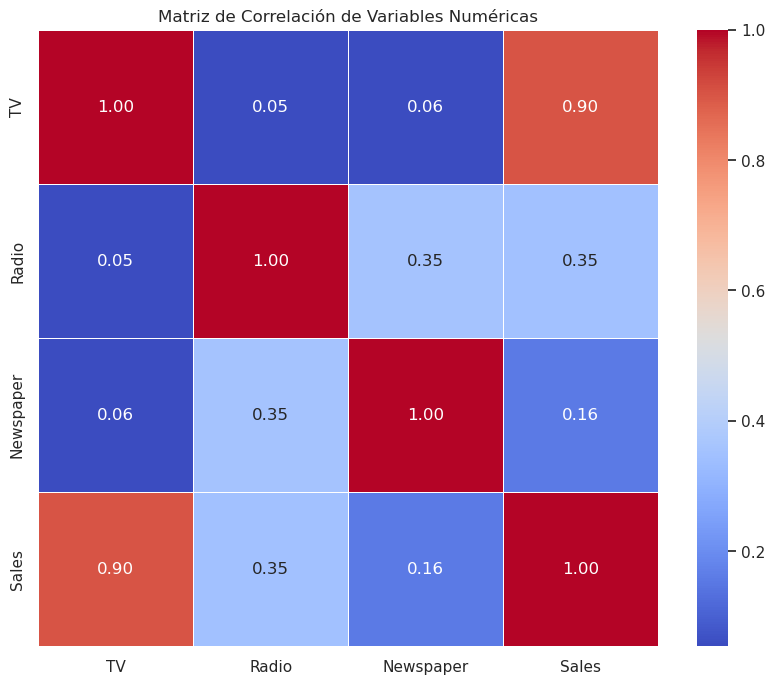

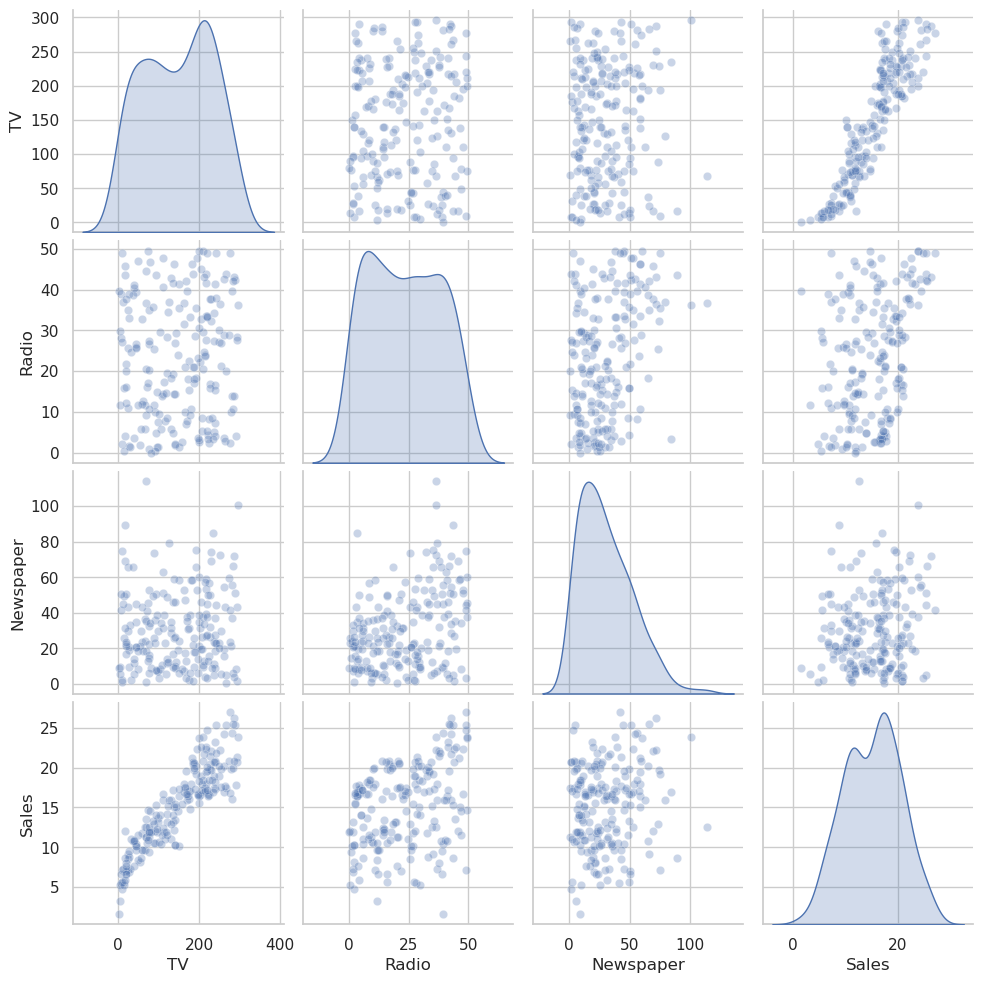

In [ ]:
# Correlación y heatmap

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df, plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?


### Análisis de Multicolinealidad ###


,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


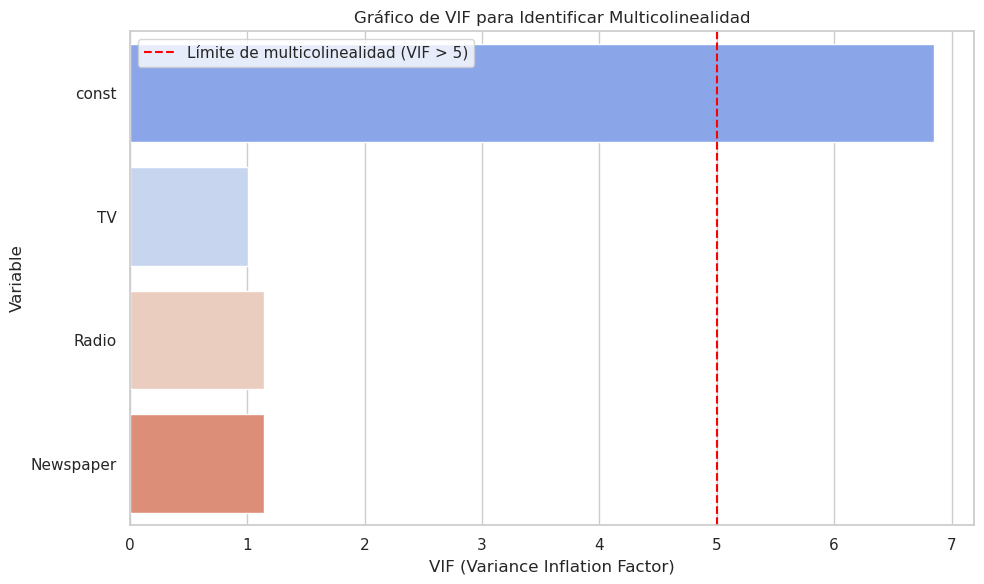

In [ ]:
#Multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Agregar constante para calcular el VIF
X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
display(vif_data)

# Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, hue='Variable', palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

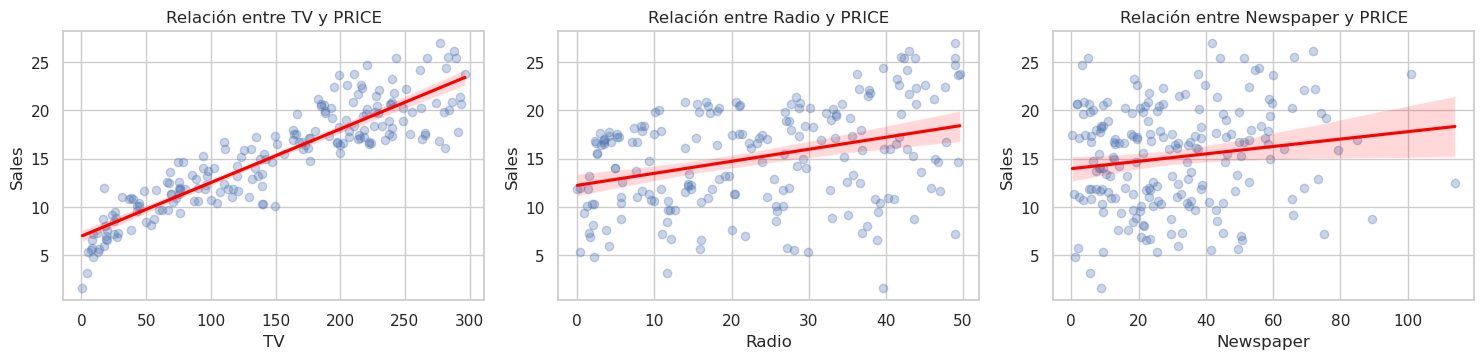

In [ ]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
X = df.drop(columns='Sales')
y = df['Sales']

plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=X[col], y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
    plt.title(f"Relación entre {col} y PRICE")

plt.tight_layout()
plt.show()

In [ ]:
#modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 📐 Obtener los Coeficientes y el Término Independiente:

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
print('\n')
equation = f"PRICE = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficientes estimados: [4.66270025 1.58465027 0.00729187]
Término independiente estimado: 15.130500000000001




'PRICE = 15.130500000000001 + (4.662700245086694 * TV) + (1.5846502733236385 * Radio) + (0.0072918683037688226 * Newspaper) '

### Interpretacion de los coeficientes
$\text{Sales} = \beta_0 + \beta_1 \cdot \text{TV} + \beta_2 \cdot \text{Radio} + \beta_3 \cdot \text{Newspaper} $

In [ ]:
import statsmodels.api as sm

# Agregar una constante al conjunto de datos X_scaled
X_scaled_with_constant = sm.add_constant(X_scaled)

# Ajustar el modelo de regresión lineal utilizando statsmodels
model_sm = sm.OLS(y, X_scaled_with_constant).fit()

# Imprimir el resumen del modelo
display(model_sm.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           8.13e-99
Time:                        13:15:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.000      14.899      15.362
x1             4.6627      0.118     39.592      0.000       4.430       4.895
x2             1.5847      0.126     12.604      0.000       1.337       1.833
x3             0.0073      0.126      0.058      0.954      -0.241       0.255
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         1.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

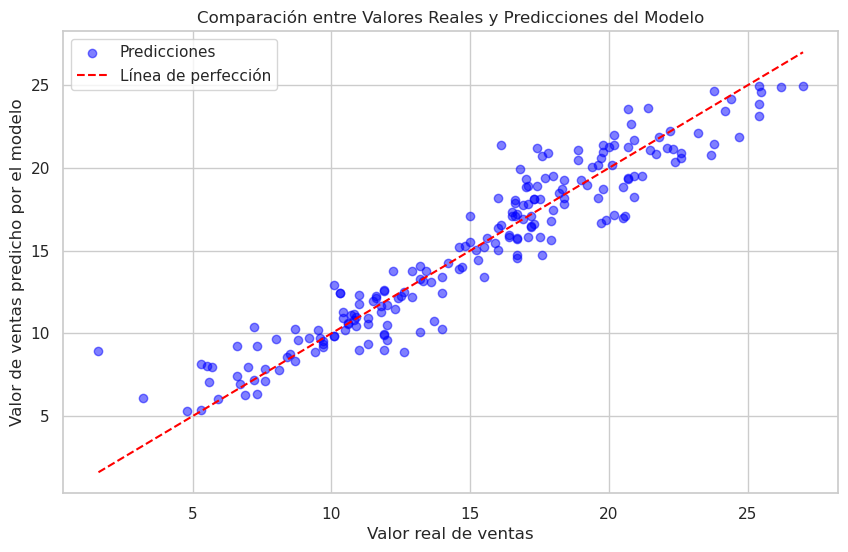


Comparación entre las predicciones y los valores reales:
   Valor Real  Predicción
0        22.1   21.220972
1        10.4   11.268248
2        12.0   10.496209
3        16.5   17.312447
4        17.9   15.644137


In [ ]:
# Realizar predicciones con el modelo
y_pred = model.predict(X_scaled)

import matplotlib.pyplot as plt





### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

   **Si parecen tener una distribucion normal**

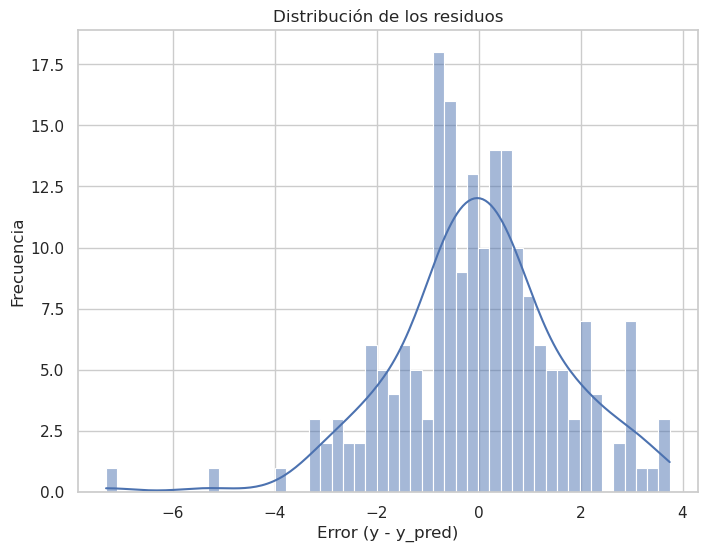

In [ ]:
#residuos
# Normalidad de los residuos
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

In [ ]:
## Q-Q Plot
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

In [ ]:
#Normalidad de los residuos

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

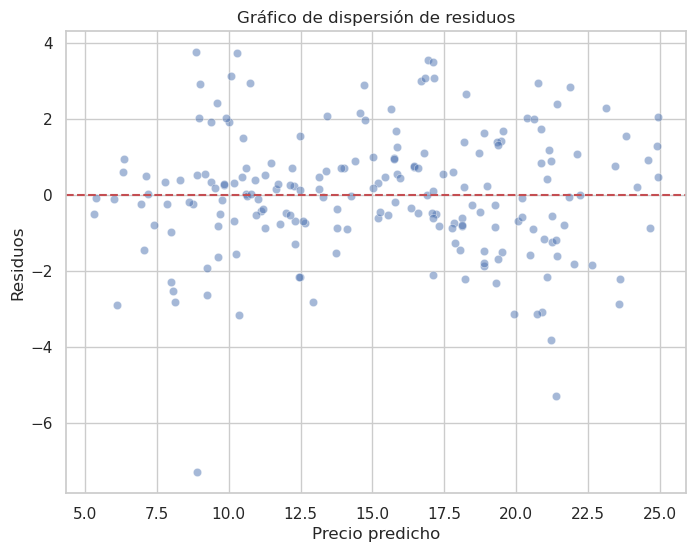

In [ ]:
# Homocedasticidad
# Gráfico de residuos vs predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos")
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

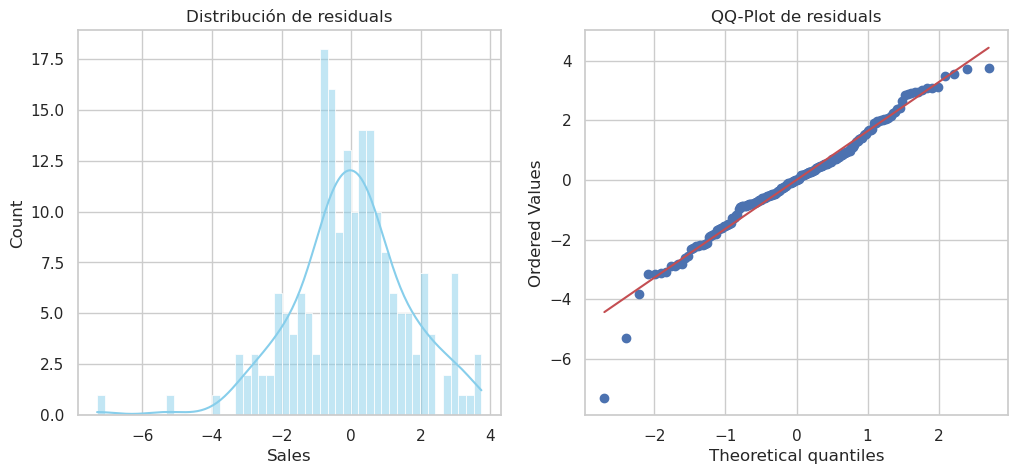


Pruebas de normalidad para la columna: residuals
Shapiro-Wilk Test: p-valor = 0.00158
Kolmogorov-Smirnov Test: p-valor = 0.12577
Anderson-Darling Test: Estadístico = 0.84765
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00032


In [ ]:
plot_distribution(residuals, 'residuals')
normality_tests(residuals, 'residuals')

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [ ]:
#Evaluación del Modelo
MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lineal simple:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")

Evaluación del modelo Lineal simple:
MSE: 2.71
RMSE: 1.64
MAE: 1.24
R^2: 0.9026


* El $R^2$ al ser 0.90 se puede decir que tiene un mejor rendimiento que los otros ejercicios que se han realizado.
Esto se puede deber a que los datos en este set se acercan bastante a un comportamiento lineal.

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

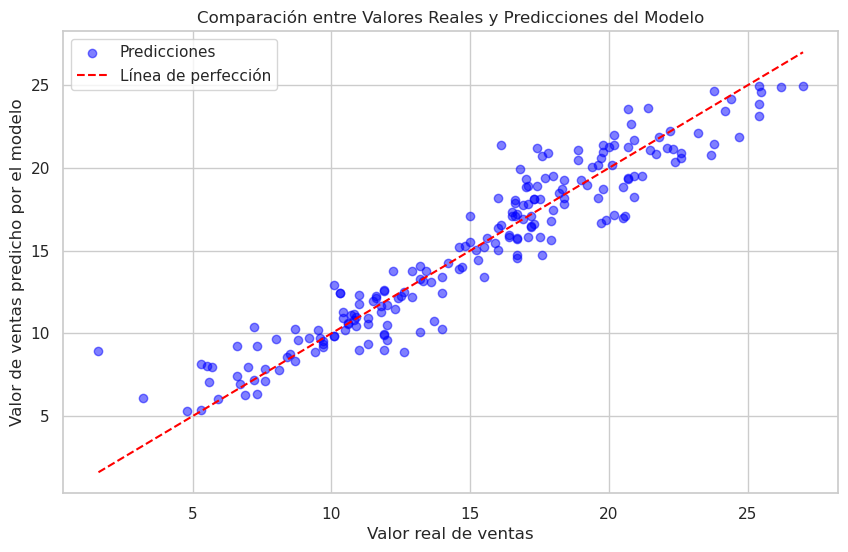


Comparación entre las predicciones y los valores reales:
   Valor Real  Predicción
0        22.1   21.220972
1        10.4   11.268248
2        12.0   10.496209
3        16.5   17.312447
4        17.9   15.644137


In [ ]:
#  Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs las predicciones
plt.scatter(y, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de perfección')

# Añadir título y etiquetas
plt.title("Comparación entre Valores Reales y Predicciones del Modelo")
plt.xlabel("Valor real de ventas")
plt.ylabel("Valor de ventas predicho por el modelo")

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()#Visualización de las Predicciones
comparison = pd.DataFrame({
    'Valor Real': y.head(),
    'Predicción': y_pred[:5]  # Primeras 5 predicciones
})

print("\nComparación entre las predicciones y los valores reales:")
print(comparison)

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [ ]:
#P-values

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

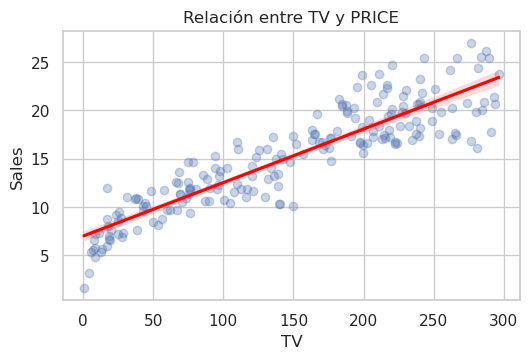

In [ ]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
X = df.drop(columns=['Sales','Radio','Newspaper'])
y = df['Sales']

plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=X[col], y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
    plt.title(f"Relación entre {col} y PRICE")

plt.tight_layout()
plt.show()

In [ ]:
#modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
print('\n')
equation = f"PRICE = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficientes estimados: [4.74996588]
Término independiente estimado: 15.130500000000001




'PRICE = 15.130500000000001 + (4.74996587905691 * TV) '

In [ ]:
# Realizar predicciones con el modelo
y_pred = model.predict(X_scaled)


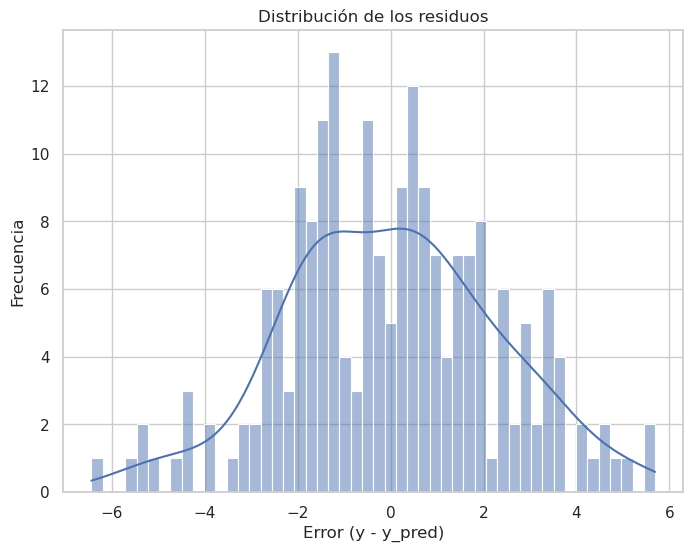

In [ ]:
#residuos
# Normalidad de los residuos
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

In [ ]:
#Evaluación del Modelo
MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lineal simple:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")

Evaluación del modelo Lineal simple:
MSE: 5.22
RMSE: 2.28
MAE: 1.83
R^2: 0.8122


##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?

* Cuando utilize todas las variables y las estadarize con StandardScaler se obtuvieron los mejores resultado.
Creo que cuando apezar que algunas variables no tienen mucha relacion con 'Sales' si aportan al modelo.
¿Cuál fue el atributo que mas influencia tiene en las ventas?

* El atributo con mayor invuencia en las ventas es la inversion hecha en anuncios de TV.